In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


<AxesSubplot:>

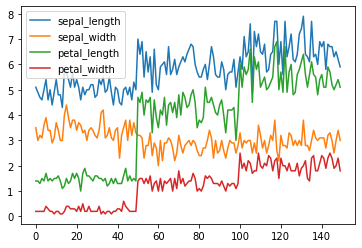

In [2]:
# Importing the Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal_length','sepal_width','petal_length','petal_width','species']

# Read dataset to pandas datframe
data = pd.read_csv(url, names=names)
data.plot()

In [3]:
# Check dataset
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
X = data.iloc[:, :-1].values # Features
y = data.iloc[:, 4].values # Target

In [5]:
# Create training and test splits (80% train - 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [6]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# Training and Predictions
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5) # 5 is value of K
classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [8]:
# Make predictions on our test data
y_pred = classifier.predict(X_test)

In [17]:
# Evaluating the ALgorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[11  0  0]
 [ 0  9  1]
 [ 0  2  7]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.82      0.90      0.86        10
 Iris-virginica       0.88      0.78      0.82         9

       accuracy                           0.90        30
      macro avg       0.90      0.89      0.89        30
   weighted avg       0.90      0.90      0.90        30



In [18]:
# Comparing Error Rate with the K value
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

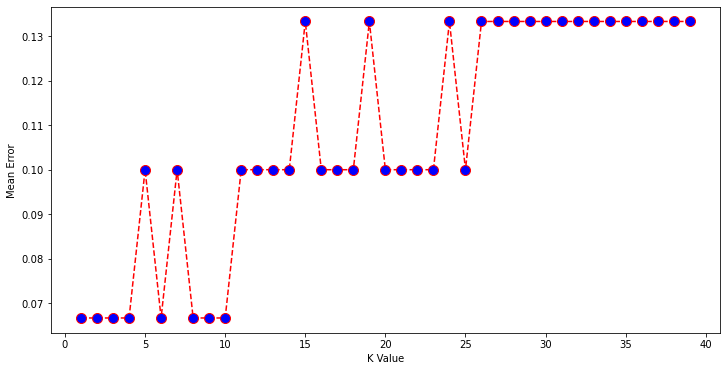

In [19]:
# plot the error values againt K values
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', ls="--", marker='o', markerfacecolor='blue', markersize=10)
plt.xlabel("K Value")
plt.ylabel("Mean Error")